In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline

In [0]:
files.upload()

In [0]:
data = pd.read_csv('weights_heights.csv', index_col = 'Index')

In [6]:
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


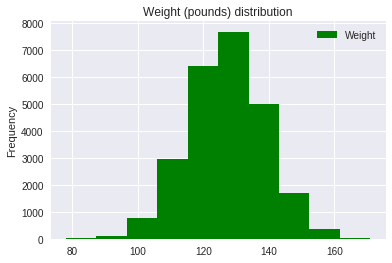

In [6]:
data.plot(y = 'Weight', kind = ('hist'), color = 'green', title = 'Weight (pounds) distribution')

In [0]:
def make_bmi(height_inch, weight_pound):
  METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
  return (weight_pound / KILO_TO_POUND) / (height_inch / METER_TO_INCH) 

In [0]:
data['bmi'] = data.apply(lambda row: make_bmi(row['Height'], row['Weight']), axis = 1)

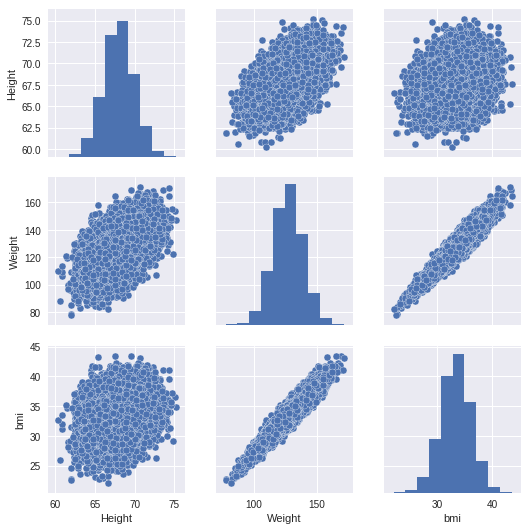

In [9]:
sns.pairplot(data)

In [0]:
def weight_category(weight):
    return int(weight < 120) + 3 * int(weight >= 150) + 2 * int(weight >= 120 and weight < 150)

data['weight_cat'] = data.apply(lambda row: weight_category(row['Weight']), axis = 1)

In [12]:
data[:5]

,Height,Weight,bmi,weight_cat
Index,,,,
1,65.78331,112.9925,30.673658,1
2,71.51521,136.4873,34.082033,2
3,69.39874,153.0269,39.377475,3
4,68.21660,142.3354,37.261002,2
5,67.78781,144.2971,38.013484,2


In [0]:
data.drop('weight_cat', axis = 1, inplace = True)

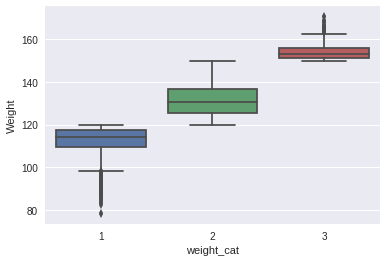

In [14]:
sns.boxplot(data = data, x = 'weight_cat', y = 'Weight')

In [0]:
?sns.boxplot

In [0]:
def quadratic_error(w0, w1):
  y = np.array(data['Height'])
  x = np.array(data['Weight'])
  return sum((y - (w0 + w1 * x)) ** 2) 

In [0]:
def lin_reg(w0, w1, x):
  return w0 + w1 * x

In [46]:
data['Weight'].min()

78.01476

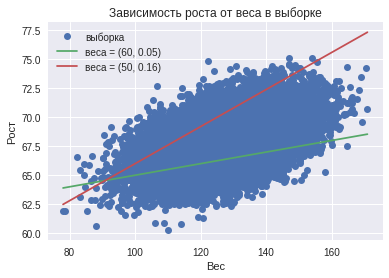

In [70]:
x = np.array(data['Weight'])
y = np.array(data['Height'])
plt.plot(x, y, 'o', label = 'выборка'.decode('utf-8'))
x = np.linspace(data['Weight'].min(), data['Weight'].max(), 1000)
y = np.linspace(data['Height'].min(), data['Height'].max(), 1000)
plt.plot(x, lin_reg(60, 0.05, x), label = 'веса = (60, 0.05)'.decode('utf-8'))
plt.plot(x, lin_reg(50,0.16, x), label = 'веса = (50, 0.16)'.decode('utf-8'))
plt.xlabel('Вес'.decode('utf-8'))
plt.ylabel('Рост'.decode('utf-8'))
plt.title('Зависимость роста от веса в выборке'.decode('utf-8'))
plt.legend()

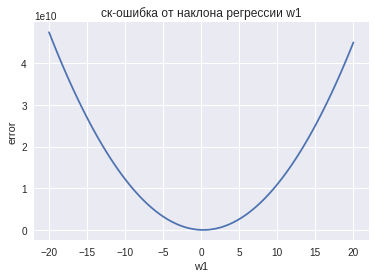

In [83]:
w1 = np.linspace(-20, 20, 100)
error = np.array([])
for iw1 in w1:
  error = np.append(error, quadratic_error(50, iw1))
plt.plot(w1, error)
plt.xlabel('w1')
plt.ylabel('error')
plt.title('ск-ошибка от наклона регрессии w1'.decode('utf-8'))
plt.show()

In [0]:
from scipy.optimize import minimize

In [88]:
res = minimize_scalar(lambda w1 : quadratic_error(50, w1), bounds=(-5, 5))
round(res.x, 3)

0.141

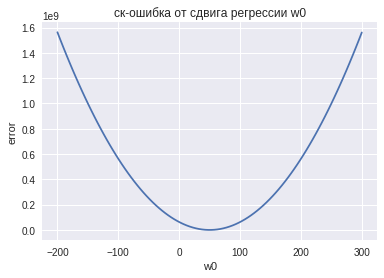

In [95]:
w0 = np.linspace(-200, 300, 100)
error = np.array([])
for iw0 in w0:
  error = np.append(error, quadratic_error(iw0, 0.141))
plt.plot(w0, error)
plt.xlabel('w0')
plt.ylabel('error')
plt.title('ск-ошибка от сдвига регрессии w0'.decode('utf-8'))
plt.show()

In [96]:
res = minimize_scalar(lambda w0 : quadratic_error(w0, 0.141), bounds=(-100, 100))
round(res.x, 3)

50.075

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline
data = pd.read_csv('weights_heights.csv', index_col = 'Index')

In [0]:
from mpl_toolkits.mplot3d import Axes3D

In [0]:
data = data[:10]

In [0]:
def quadratic_error(w):
  y = np.array(data['Height'])
  x = np.array(data['Weight'])
  return sum((y - (w[0] + w[1] * x)) ** 2) 

In [0]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
w1 = np.linspace(-5, 10, data['Weight'].count())
w0 = np.linspace(-50, 100, data['Weight'].count())
error = []
for iw1 in w1:
  ierror = np.array([])
  for iw0 in w0:
    ierror = np.append(ierror, quadratic_error(iw0, iw1))
#   print ierror
  error.append(ierror)
error = np.array(error)
w0, w1 = np.meshgrid(w0, w1)

surf = ax.plot_surface(w0, w1, error)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

In [79]:
res = minimize(quadratic_error, [0,0], bounds = [(-100, 100), (-5, 5)], method = 'L-BFGS-B')
res

      fun: 67545.2870856901
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.01309672, 0.13824319])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 51
      nit: 12
   status: 0
  success: True
        x: array([57.57175421,  0.08200666])